# Titanic - Competition

**Objetivo do projeto:** Este projeto é o uso do machine learning para a predição de quais passageiros sobreviveram ao naufrágio do Titanic. O projeto se baseia no dataset disponível no Kaggle e no projeto de referência que realiza uma análise exploratória dos dados. O objetivo é desenvolver os conhecimentos em python e em técnicas de análise de dados, bem como aplicar a metodologia CRISP-DM para criar um modelo preditivo.

Links utilizados para o projeto:
- [dataset](https://www.kaggle.com/competitions/titanic/data)
- [competicao](https://www.kaggle.com/competitions/titanic/overview)

vídeos e artigos:
- [Mario_Filho](https://www.youtube.com/watch?v=1KguWZH4hXw&t)
- [artigo](https://medium.com/@jair.oliveira1204/iniciando-em-machine-learning-com-o-desafio-do-titanic-parte-i-bbec3f03e4a0)

### Importando bibliotecas

In [1]:
#instalando bibliotecas
%pip install pandas
%pip install numpy

#importando bibliotecas
import pandas as pd
import numpy as np

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Inteli\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\Users\Inteli\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


### Funções

In [2]:
# funcao para transformar -> Female | 1 e Male | 0 
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

### lendo dataset

**Conjunto de treino:** O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de Machine Learning. Nele contém a variável Survived que possui a informação daqueles que sobreviveram ou não.

**Conjunto de teste:** usado para ver o desempenho do seu modelo em dados não vistos. Para este conjunto não foi fornecido a verdade básica para cada passageiro. *É nosso trabalho prever esses resultados*. 

In [3]:
# conjunto de treino - criar modelos
train = pd.read_csv('train.csv')

# conjunto de teste - analisar desempenho em dados não visto
test = pd.read_csv('test.csv')

## Analisando Dados

| Variável  | Definição | Chave |
| ------------- | ------------- | ------------- |
| survival  |  sobreviventes  | 0 = No, 1 = Yes
| pclass  | classe do bilhete  | 1 = 1st, 2 = 2nd, 3 = 3rd
| sex | sexo |
| age | idade em anos |
| sibsp | nº de irmãos/cônjuges a bordo |
| parch | nº de pais/crianças a bordo |
| ticket | nº do bilhete |
| fare | tarifa de passageiros |
| cabin | nº da cabine |
| embarked | porto de embarcação | C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
# tipo de dados 
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
# identificando valores nulos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# distribuicao estatistica
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualização dos dados

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

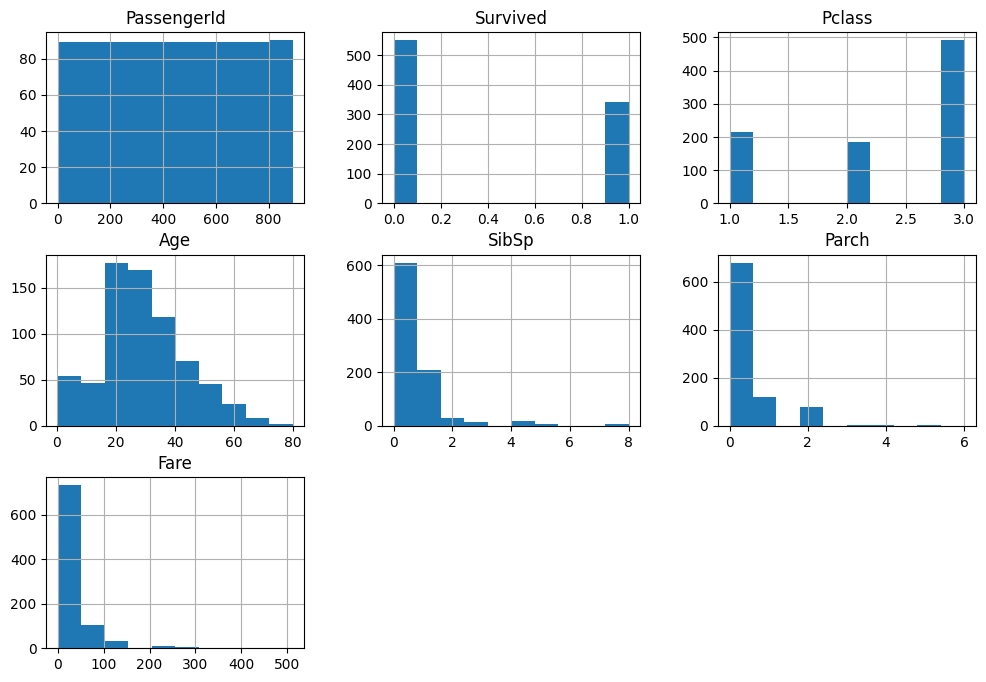

In [7]:
# visualizando dados de treino
train.hist(figsize=(12,8))

In [8]:
# criando uma nova coluna mapeando a funcao para cada linha | Female = 1 | Male = 0 |
train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [9]:
variaveis = ['Sex_binario', 'Age']

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Modelagem 01 - RandomForest
Esse modelo obteve: 0.71291 score no Kaggle

In [11]:
# importando biblioteca para primeiro modelo
from sklearn.ensemble import RandomForestClassifier

# importando biblioteca para separar dados de treino e teste
from sklearn.model_selection import train_test_split

In [12]:
X = train[variaveis].fillna(-1)
y = train['Survived']

In [13]:
# lista de 10 elementos
X_falso = np.arange(10)
X_falso


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
# realizando a separação dos dados de treino e teste 
# test_size = 0.5 indica que 50% dos dados serão usados para treino e 50% para teste
# random_state = 0 indica que a separação será feita de forma aleatória
np.random.seed(1)
# separando os dados de treino e validacao
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [15]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((445, 2), (446, 2), (445,), (446,))

In [16]:
# criando a instancia do modelo
# random state = random seed
modelo = RandomForestClassifier(n_estimators=100,n_jobs=1, random_state=0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_jobs=1, random_state=0)

In [17]:
# realizando a previsao com os dados de validacao
p = modelo.predict(X_valid)

In [18]:
# calculando a acuracia do modelo 
# media de acertos 
np.mean(y_valid == p)

0.7466367713004485

In [19]:
# prever que todas as mulheres irão sobreviver
# mudando o valor para int
p = (X_valid['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.7623318385650224

### Reamostragem dos dados - validação cruzada

In [20]:
# importando biblioteca para avaliar o modelo
from sklearn.model_selection import KFold

In [32]:
# 2 = numero de folds/validacoes
# shuffle = True indica que os dados serão embaralhados
# random_state = 0 indica que a separação será feita de forma aleatória
for rep in range(10):
    print("Rep:", rep)
    for linhas_treino, linhas_valid in KFold(3, shuffle=True, random_state=1).split(X):
        print("Treino:", linhas_treino.shape[0])
        print("Valid:", linhas_valid.shape[0])
        print()

        X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

        modelo.fit(X_treino, y_treino)
        p = modelo.predict(X_valid)

        results = []
        acc = np.mean(y_valid == p)
        results.append(acc)
        print("Accuracy:", acc)
        print()


Rep: 0
Treino: 594
Valid: 297

Accuracy: 0.7575757575757576

Treino: 594
Valid: 297

Accuracy: 0.7710437710437711

Treino: 594
Valid: 297

Accuracy: 0.7878787878787878

Rep: 1
Treino: 594
Valid: 297

Accuracy: 0.7575757575757576

Treino: 594
Valid: 297

Accuracy: 0.7710437710437711

Treino: 594
Valid: 297

Accuracy: 0.7878787878787878

Rep: 2
Treino: 594
Valid: 297

Accuracy: 0.7575757575757576

Treino: 594
Valid: 297

Accuracy: 0.7710437710437711

Treino: 594
Valid: 297

Accuracy: 0.7878787878787878

Rep: 3
Treino: 594
Valid: 297

Accuracy: 0.7575757575757576

Treino: 594
Valid: 297

Accuracy: 0.7710437710437711

Treino: 594
Valid: 297

Accuracy: 0.7878787878787878

Rep: 4
Treino: 594
Valid: 297

Accuracy: 0.7575757575757576

Treino: 594
Valid: 297

Accuracy: 0.7710437710437711

Treino: 594
Valid: 297

Accuracy: 0.7878787878787878

Rep: 5
Treino: 594
Valid: 297

Accuracy: 0.7575757575757576

Treino: 594
Valid: 297

Accuracy: 0.7710437710437711

Treino: 594
Valid: 297

Accuracy: 0.7878

In [33]:
np.mean(results)

0.7878787878787878

## Criar submissões

In [22]:
# criando uma estrutura de dados para ser enviado no Kaggle
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

ValueError: Length of values (3) does not match length of index (418)

In [ ]:
# transformando o arquivo em csv
sub.to_csv("primeiro_modelo.csv", header=True)